**`yelp.csv`** contains the dataset.
- Each observation (row) in this dataset is a review of a particular business by a particular user.
- The **stars** column is the number of stars (1 through 5) assigned by the reviewer to the business. (Higher stars is better.) In other words, it is the rating of the business by the person who wrote the review.
- The **text** column is the text of the review

**Tip:** After each task, I recommend that you check the shape and the contents of your objects, to confirm that they match your expectations.

# **Task 1**:

Read **`yelp.csv`** into a Pandas DataFrame and examine it.

In [1]:
from google.colab import files
uploaded = files.upload()

Saving yelp.csv to yelp.csv


In [2]:
import pandas as pd

#Read the week02_yelp.csv into pandas using the csv file
yelp = pd.read_csv('yelp.csv')

In [3]:
#Examine the shape
yelp.shape

(10000, 10)

In [4]:
#Examine the first row
yelp.head(1)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0


In [6]:
#Examine the summary/description of the yelp data
yelp.describe(include=['object'])

,business_id,date,review_id,text,type,user_id
count,10000,10000,10000,10000,10000,10000
unique,4174,1995,10000,9998,1,6403
top,ntN85eu27C04nwyPa8IHtw,2011-03-28,lEN_dM8UMgTwxbOd__A9JQ,This review is for the chain in general. The l...,review,fczQCSmaWF78toLEmb0Zsw
freq,37,21,1,2,10000,38


In [7]:
#Examine the class (i.e. stars) distribution
yelp.stars.value_counts().sort_index

<bound method Series.sort_index of 4    3526
5    3337
3    1461
2     927
1     749
Name: stars, dtype: int64>

In [8]:
#Examine the reviews by filtering the stars equal to 1
yelp[yelp.stars == 1]

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
23,IJ0o6b8bJFAbG6MjGfBebQ,2010-09-05,Dx9sfFU6Zn0GYOckijom-g,1,U can go there n check the car out. If u wanna...,review,zRlQEDYd_HKp0VS3hnAffA,0,1,1
31,vvA3fbps4F9nGlAEYKk_sA,2012-05-04,S9OVpXat8k5YwWCn6FAgXg,1,Disgusting! Had a Groupon so my daughter and ...,review,8AMn6644NmBf96xGO3w6OA,0,1,0
35,o1GIYYZJjM6nM03fQs_uEQ,2011-11-30,ApKbwpYJdnhhgP4NbjQw2Q,1,"I've eaten here many times, but none as bad as...",review,iwUN95LIaEr75TZE_JC6bg,0,4,3
61,l4vBbCL9QbGiwLuLKwD_bA,2011-11-22,DJVxOfj2Rw9zklC9tU3i1w,1,I have always been a fan of Burlington's deals...,review,EPROVap0M19Y6_4uf3eCmQ,0,0,0
64,CEswyP-9SsXRNLR9fFGKKw,2012-05-19,GXj4PNAi095-q9ynPYH3kg,1,Another night meeting friends here. I have to...,review,MjLAe48XNfYlTeFYca5gMw,0,1,2
...,...,...,...,...,...,...,...,...,...,...
9924,mhQCxOiqp03qnhGRTtPduw,2012-07-07,PCjnn__E8AzNa2kXFXxTHQ,1,Horrible service.,review,rvaJcf5OIY2So_pkoqDHLQ,0,1,0
9931,C_eWAEOvkHZ_IZYGwjtpmg,2011-04-25,QfdoE-XqEeCsttJH8g0ugQ,1,I love Saddle Ranch for its casual night time ...,review,yhGfcKunPjcy-v-1ppr6oQ,0,2,0
9953,QCxXYA13PtkD3wec47_r8Q,2012-03-14,V2N2TCqnaqMYfg7zXGG-Rg,1,"""Hipster,Trendy"" ????-I think NOT !!!! Very di...",review,JEQ6el2-tLtKJU6k_SpE-w,0,2,0
9984,wepFVY82q_tuDzG6lQjHWw,2012-02-12,spusZYROtBKw_5tv3gYm4Q,1,Went last night to Whore Foods to get basics t...,review,W7zmm1uzlyUkEqpSG7PlBw,0,1,2


In [9]:
#analyze reviews by year
yelp.dtypes

business_id    object
date           object
review_id      object
stars           int64
text           object
type           object
user_id        object
cool            int64
useful          int64
funny           int64
dtype: object

In [ ]:
# convert date's object to numeric or to integer


In [10]:
# Check whether the date converted to integer
yelp['date'] = pd.to_datetime(yelp.date)

In [11]:
yelp.dtypes

business_id            object
date           datetime64[ns]
review_id              object
stars                   int64
text                   object
type                   object
user_id                object
cool                    int64
useful                  int64
funny                   int64
dtype: object

In [12]:
# Extract only the years from the date series (date column)
# https://pandas.pydata.org/pandas-docs/stable/reference/series.html
yelp.date.dt.year

0       2011
1       2011
2       2012
3       2010
4       2012
        ... 
9995    2012
9996    2012
9997    2010
9998    2012
9999    2010
Name: date, Length: 10000, dtype: int64

In [13]:
#Examine the 1st row of the yelp data
yelp.head(1)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0


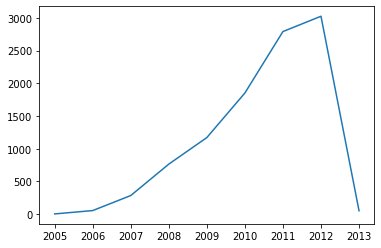

In [16]:
#Show the distribution of yelp reviews by year on a graph
%matplotlib inline
#add one column: year in the dataframe
yelp['year'] = yelp.date.dt.year
yelp.head(1)
yelp.year.value_counts().sort_index().plot()

In [17]:
#Examine the average star ratigs only by year
yelp.stars.mean()

3.7775

In [18]:
#Examine the years with mean stars by using groupby
yelp.groupby('year').stars.mean()

year
2005    3.250000
2006    3.709091
2007    3.835088
2008    3.743791
2009    3.754056
2010    3.796436
2011    3.787173
2012    3.766942
2013    4.019231
Name: stars, dtype: float64

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


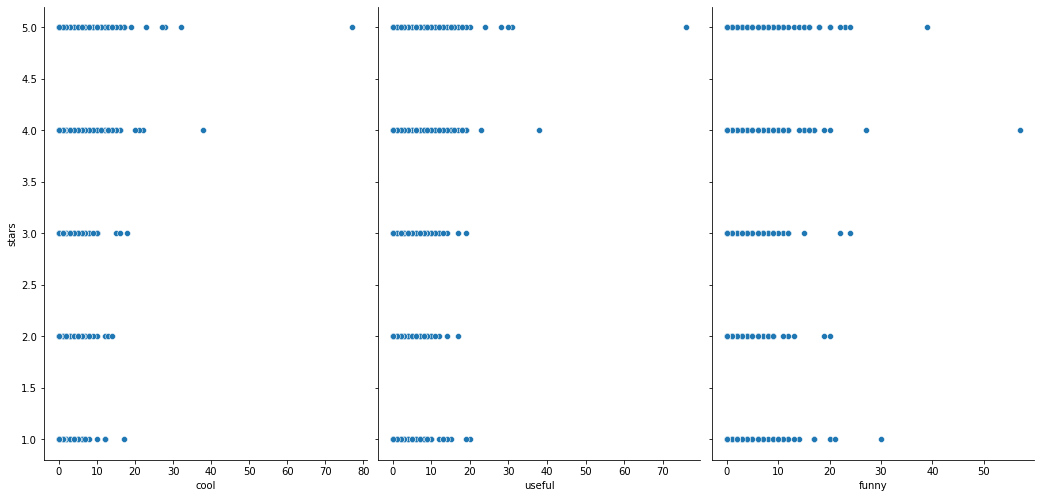

In [19]:
#visualize the relationship between features (cool,useful,funny) and the 
#response stars using scatterplots
import seaborn as sns #conventional way to import seaborn

sns.pairplot(yelp, x_vars=['cool','useful','funny'], y_vars='stars', size=7, aspect=0.7)

In [ ]:
True | False
#only True if any one of the sides is True

True

In [ ]:
False | True

True

In [ ]:
False | False

False

In [ ]:
True & False
#only True if both sides are True

False

In [ ]:
False & False

False

In [ ]:
True & True

True

In [20]:
#Look for reviews with stars equal to 1 & funny equals to 4
#add parantheses for pandas to know about the evaluation order
#pandas needs to know in what order to evaluate all these separate statements
yelp[(yelp.stars == 1) & (yelp.funny == 4)]

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,year
575,nfyqtEoufkhjv97IueK7Ow,2011-03-04,6-Bd6EH7f4iOClnPi3R5pg,1,Here's the 1. 2. 3...\n\n1. Great Food. I love...,review,zzmRKNph-pBHDL2qwGv9Fw,1,4,4,2011
842,Rx9WPIaYCBquFBC563RjYg,2009-04-19,ukSAApxk4-vjK1Jt6NXRgg,1,Boy is the name a temptation.Seriously :) I'l...,review,N3L6SDymSRkYQtTiSDmXSg,1,3,4,2009
1021,2qbajPD8M7PJlWWaHSRR5Q,2008-11-19,WxVChik_0ZMOceJWxukG6w,1,Glad this place has new ownership... I should ...,review,VBKbZD9X4zruXYORIhJhhg,3,6,4,2008
2822,tdcjXyFLMKAsvRhURNOkCg,2010-07-12,CCw0OX1RwsyxFYUwzMxS8g,1,"Bad music, slow service, disgusting overpriced...",review,OMqlb9paqHOSOPGiVeL6Qg,0,2,4,2010
3647,lBRCMN7wNn-BKUsaOXJRow,2008-08-12,qmkpZSuY2zvAQwn4fQqfIw,1,I went in once looking for Canidae. Which acc...,review,WpOXBiNf7vmRxZf1oTDncg,0,0,4,2008
4252,i41M_To0DAxuzZIGvU1wyg,2008-01-24,r7KI7dCOCdeQA8D2yKuwCA,1,Bitzee Mama's isn't my mama! My mama wouldn't ...,review,lPaYMDmJbAnv_3pmZH_inw,3,5,4,2008
4463,R7SVavAsjzN3wy825PiOEg,2011-04-18,qcf2bIRTGrkCOxeud5xMaw,1,I wouldn't write a review on a franchise unles...,review,jdeNI5TTTuM6mj3HTgstRA,3,10,4,2011
5492,zxjMiqlfUuIQRltSuj9FpQ,2011-08-05,HmfF4Bbrt757h2uXv8op2Q,1,"Sadly, I'm giving this place one star and an e...",review,KgnQz4WFT892AXmimnP4jg,2,1,4,2011
5742,X5QTGpPfqXFtmtizsGAksw,2011-09-09,oAH1svCcQNDk3-n8LYEgOA,1,Oh boy.. I usually LOVE LOVE Mucho Gusto.. but...,review,Nh1-RLlCU5i0MCH7so6_-g,2,3,4,2011
5955,NH67MdKaFGNcP-dlu56pyw,2008-11-16,_sBjoWMQk-XavBoj6mSJlA,1,I've now tried Thai Elephant three times. My ...,review,Y2-KtEL3k8Ai5gLzeIRX9w,5,4,4,2008


In [23]:
#Look for reviews that are either funny rated as 8 or 9 or 10
yelp[(yelp.funny == 8)|(yelp.funny == 9)|(yelp.funny == 10)]

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,year
82,d7_jkx0VPx3uHsUl18iHMQ,2009-06-16,xE2MKvzes5Twg-jfAe8s4Q,5,Beer...or Yoga?\n\nLocated in a small center j...,review,mfvezpz6ohS0NQk3DZdvqQ,11,16,8,2009
90,hW0Ne_HTHEAgGF1rAdmR-g,2010-07-06,6iEP6dvHIefVMMnjeDRNcQ,1,The beach paradise of Ixtapa-Zihuatenejo await...,review,8tbXmjYGsYFZXk6ppuwRWQ,7,7,9,2010
144,zp713qNhx8d9KCJJnrw1xA,2010-02-02,qyzPbUwY_QgqdEputNWk6g,5,Perhaps it was foolish for me to give La Conde...,review,dQO0tQISZyb9L4d5ASnXyQ,16,17,9,2010
163,HGOsJ1-GXCk5_8RmwKxomA,2009-06-14,RSwZ_b5xV9ovGXTX3mux_w,2,eewh! yuck and wtf!?\n\nThis Barnes & Noble Bo...,review,nZ9XFVETN4hxdK4qPb-T3Q,4,5,8,2009
220,dSQh1Hx2BiSrYog4ad740A,2007-01-23,4YSQvTgbGy5DraaXM4DGRQ,4,You may think this is a cop out... writing a r...,review,DJIwm4UCnM-SOxXbARjPsQ,2,2,8,2007
...,...,...,...,...,...,...,...,...,...,...,...
9287,cLojUtqkFpVIHFEvA_5Atw,2010-07-02,BhxmTjAN9MybthTa_0hYAQ,1,"I don't intend to return, but based on the way...",review,vsXP832M0kOxKpfduD7dWw,10,13,10,2010
9303,bzXDUQ-5Odzx5WZNoSoANg,2012-01-18,TZCONpt5xdDDJMGqavtfmA,5,"When people feel a cold coming, they pop a zin...",review,m7vtKWpZ9wdEQ95wJxrMrg,10,10,8,2012
9311,AtoMSHZ-lO7kxHRBdioMtA,2009-08-02,xFVs_Ya2YLejW9tKgIvdbw,5,I was given a $100 gift card to use at Willow ...,review,fczQCSmaWF78toLEmb0Zsw,10,10,8,2009
9489,zmFc8M-hS4uuyY0hklIpoQ,2009-02-19,kWilrefFxn6DLRqyT8-uPA,5,Mmm dirty hipster bars. Let me count the ways...,review,o33IBagNFxdJhIrRTl691Q,4,5,8,2009


In [24]:
#To be more efficient with our coding, we can use a series method, "isin" to
#Look for reviews that are either funny rated as 8 or 9 or 10
yelp[yelp.funny.isin([8,9,10])]

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,year
82,d7_jkx0VPx3uHsUl18iHMQ,2009-06-16,xE2MKvzes5Twg-jfAe8s4Q,5,Beer...or Yoga?\n\nLocated in a small center j...,review,mfvezpz6ohS0NQk3DZdvqQ,11,16,8,2009
90,hW0Ne_HTHEAgGF1rAdmR-g,2010-07-06,6iEP6dvHIefVMMnjeDRNcQ,1,The beach paradise of Ixtapa-Zihuatenejo await...,review,8tbXmjYGsYFZXk6ppuwRWQ,7,7,9,2010
144,zp713qNhx8d9KCJJnrw1xA,2010-02-02,qyzPbUwY_QgqdEputNWk6g,5,Perhaps it was foolish for me to give La Conde...,review,dQO0tQISZyb9L4d5ASnXyQ,16,17,9,2010
163,HGOsJ1-GXCk5_8RmwKxomA,2009-06-14,RSwZ_b5xV9ovGXTX3mux_w,2,eewh! yuck and wtf!?\n\nThis Barnes & Noble Bo...,review,nZ9XFVETN4hxdK4qPb-T3Q,4,5,8,2009
220,dSQh1Hx2BiSrYog4ad740A,2007-01-23,4YSQvTgbGy5DraaXM4DGRQ,4,You may think this is a cop out... writing a r...,review,DJIwm4UCnM-SOxXbARjPsQ,2,2,8,2007
...,...,...,...,...,...,...,...,...,...,...,...
9287,cLojUtqkFpVIHFEvA_5Atw,2010-07-02,BhxmTjAN9MybthTa_0hYAQ,1,"I don't intend to return, but based on the way...",review,vsXP832M0kOxKpfduD7dWw,10,13,10,2010
9303,bzXDUQ-5Odzx5WZNoSoANg,2012-01-18,TZCONpt5xdDDJMGqavtfmA,5,"When people feel a cold coming, they pop a zin...",review,m7vtKWpZ9wdEQ95wJxrMrg,10,10,8,2012
9311,AtoMSHZ-lO7kxHRBdioMtA,2009-08-02,xFVs_Ya2YLejW9tKgIvdbw,5,I was given a $100 gift card to use at Willow ...,review,fczQCSmaWF78toLEmb0Zsw,10,10,8,2009
9489,zmFc8M-hS4uuyY0hklIpoQ,2009-02-19,kWilrefFxn6DLRqyT8-uPA,5,Mmm dirty hipster bars. Let me count the ways...,review,o33IBagNFxdJhIrRTl691Q,4,5,8,2009


In [26]:
#Look for reviews that have only 1 and 5 stars
yelp[yelp.stars.isin([1,5])]

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,year
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,2011
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,2011
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,2010
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,2012
6,zp713qNhx8d9KCJJnrw1xA,2010-02-12,riFQ3vxNpP4rWLk_CSri2A,5,Drop what you're doing and drive here. After I...,review,wFweIWhv2fREZV_dYkz_1g,7,7,4,2010
...,...,...,...,...,...,...,...,...,...,...,...
9990,R8VwdLyvsp9iybNqRvm94g,2011-10-03,pcEeHdAJPoFNF23es0kKWg,5,Yes I do rock the hipster joints. I dig this ...,review,b92Y3tyWTQQZ5FLifex62Q,1,1,1,2011
9991,WJ5mq4EiWYAA4Vif0xDfdg,2011-12-05,EuHX-39FR7tyyG1ElvN1Jw,5,Only 4 stars? \n\n(A few notes: The folks that...,review,hTau-iNZFwoNsPCaiIUTEA,1,1,0,2011
9992,f96lWMIAUhYIYy9gOktivQ,2009-03-10,YF17z7HWlMj6aezZc-pVEw,5,I'm not normally one to jump at reviewing a ch...,review,W_QXYA7A0IhMrvbckz7eVg,2,3,2,2009
9994,L3BSpFvxcNf3T_teitgt6A,2012-03-19,0nxb1gIGFgk3WbC5zwhKZg,5,Let's see...what is there NOT to like about Su...,review,OzOZv-Knlw3oz9K5Kh5S6A,1,2,1,2012


# **Task 2**
 
Create a new DataFrame that only contains the **5-star** and **1-star** reviews.

In [28]:
#Filter the DataFrame using an OR condition
yelp_best_worst = yelp[(yelp.stars== 5)|(yelp.stars ==1)]

In [39]:
# alternatively, use the 'loc' accessor to accomplish the same thing
yelp_best_worst2 = yelp.loc[(yelp.stars== 5)|(yelp.stars ==1), :]

In [40]:
# examine the shape
yelp_best_worst.shape
yelp_best_worst2.shape

(4086, 11)

# **Task 3**

Define X and y from the new DataFrame, and then split X and y into training and testing sets, using the **review text** as the only feature and the **star rating** as the response.

**Hint:** Keep in mind that X should be a Pandas Series (not a DataFrame), since we will pass it to CountVectorizer in the **task**.

In [33]:
# define X and y
X = yelp_best_worst.text
y = yelp_best_worst.stars

In [34]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 1)

In [35]:
# examine the object shapes
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3064,)
(1022,)
(3064,)
(1022,)


# **Task 4**

Use CountVectorizer to create **document-term matrices** from X_train and X_test.

In [36]:
# import and instantiate CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()

In [37]:
# fit and transform X_train into X_train_dtm
X_train_dtm = vect.fit_transform(X_train)
X_train_dtm.shape

(3064, 16825)

In [38]:
# transform X_test into X_test_dtm
X_test_dtm = vect.transform(X_test)
X_test_dtm.shape

(1022, 16825)

# **Task 5**

Use Multinomial Naive Bayes to **predict the star rating** for the reviews in the testing set, and then **calculate the accuracy**

In [ ]:
# import and instantiate MultinomialNB
from sklearn.naive_bayes import MultinomialNB


In [ ]:
# train the model using X_train_dtm


In [ ]:
# make class predictions for X_test_dtm


From [Scikit-learn documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score):

> The **accuracy score** function computes the accuracy, the **fraction of correct predictions**.

In [ ]:

# calculate accuracy score of class predictions
from sklearn import metrics
